In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk 
import pandas as pd 
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud 

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARBAZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
text = "Harry woke with a start. His aunt rapped on the door again. 'Up!' she screeched. Harry heard her walking toward the kitchen and then the sound of the frying pan being put on the stove. He rolled onto his back and tried to remember the dream he had been having. It had been a good one. There had been a flying motorcycle in it. He had a funny feeling he'd had the same dream before."

In [7]:
eng_stopwords = stopwords.words('english')
print(eng_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [9]:
text = text.lower()

# Words and Sentence Tokenization

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ARBAZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [17]:
word_tokens = nltk.word_tokenize(text)
print(word_tokens)

['harry', 'woke', 'with', 'a', 'start', '.', 'his', 'aunt', 'rapped', 'on', 'the', 'door', 'again', '.', "'up", '!', "'", 'she', 'screeched', '.', 'harry', 'heard', 'her', 'walking', 'toward', 'the', 'kitchen', 'and', 'then', 'the', 'sound', 'of', 'the', 'frying', 'pan', 'being', 'put', 'on', 'the', 'stove', '.', 'he', 'rolled', 'onto', 'his', 'back', 'and', 'tried', 'to', 'remember', 'the', 'dream', 'he', 'had', 'been', 'having', '.', 'it', 'had', 'been', 'a', 'good', 'one', '.', 'there', 'had', 'been', 'a', 'flying', 'motorcycle', 'in', 'it', '.', 'he', 'had', 'a', 'funny', 'feeling', 'he', "'d", 'had', 'the', 'same', 'dream', 'before', '.']


# Removing Punctuations

In [21]:
sentence_tokens = nltk.sent_tokenize(text)
print(sentence_tokens)

['harry woke with a start.', 'his aunt rapped on the door again.', "'up!'", 'she screeched.', 'harry heard her walking toward the kitchen and then the sound of the frying pan being put on the stove.', 'he rolled onto his back and tried to remember the dream he had been having.', 'it had been a good one.', 'there had been a flying motorcycle in it.', "he had a funny feeling he'd had the same dream before."]


In [27]:
nltk.download('averaged_perceptron_tagger_eng')
pos_tag = nltk.pos_tag(word_tokens)
print(pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ARBAZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


[('harry', 'NN'), ('woke', 'VBD'), ('with', 'IN'), ('a', 'DT'), ('start', 'NN'), ('.', '.'), ('his', 'PRP$'), ('aunt', 'NN'), ('rapped', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('door', 'NN'), ('again', 'RB'), ('.', '.'), ("'up", 'UH'), ('!', '.'), ("'", "''"), ('she', 'PRP'), ('screeched', 'VBD'), ('.', '.'), ('harry', 'VB'), ('heard', 'VBD'), ('her', 'PRP'), ('walking', 'VBG'), ('toward', 'IN'), ('the', 'DT'), ('kitchen', 'NN'), ('and', 'CC'), ('then', 'RB'), ('the', 'DT'), ('sound', 'NN'), ('of', 'IN'), ('the', 'DT'), ('frying', 'NN'), ('pan', 'NN'), ('being', 'VBG'), ('put', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('stove', 'NN'), ('.', '.'), ('he', 'PRP'), ('rolled', 'VBD'), ('onto', 'IN'), ('his', 'PRP$'), ('back', 'NN'), ('and', 'CC'), ('tried', 'VBD'), ('to', 'TO'), ('remember', 'VB'), ('the', 'DT'), ('dream', 'NN'), ('he', 'PRP'), ('had', 'VBD'), ('been', 'VBN'), ('having', 'VBG'), ('.', '.'), ('it', 'PRP'), ('had', 'VBD'), ('been', 'VBN'), ('a', 'DT'), ('good', 'JJ'), ('one', 'NN')

# Removal of Stopwords

In [30]:
without_stopwords = [word for word in word_tokens if word not in eng_stopwords]
print(without_stopwords)

['harry', 'woke', 'start', '.', 'aunt', 'rapped', 'door', '.', "'up", '!', "'", 'screeched', '.', 'harry', 'heard', 'walking', 'toward', 'kitchen', 'sound', 'frying', 'pan', 'put', 'stove', '.', 'rolled', 'onto', 'back', 'tried', 'remember', 'dream', '.', 'good', 'one', '.', 'flying', 'motorcycle', '.', 'funny', 'feeling', "'d", 'dream', '.']


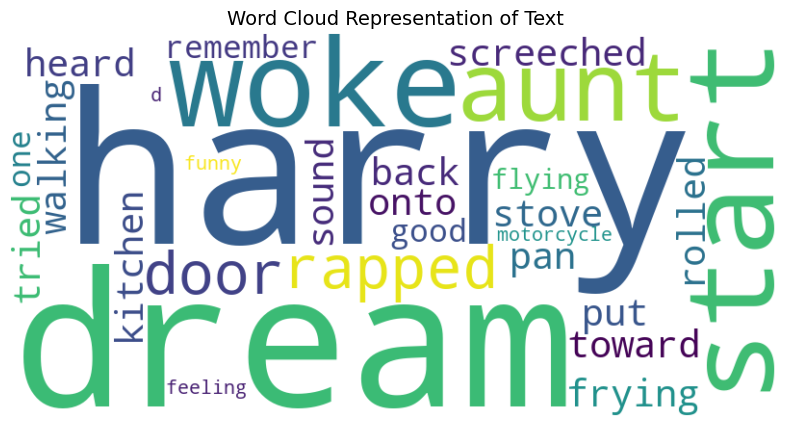

In [32]:
import matplotlib.pyplot as plt
cleaned_text = " ".join(without_stopwords) 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Hide axes
plt.title("Word Cloud Representation of Text", fontsize=14)
plt.show()


# Lemmatization and Stemming

In [35]:
nltk.download('wordnet') 
wordnetlemmatizer = WordNetLemmatizer()
lemmatized_words = [wordnetlemmatizer.lemmatize(word) for word in without_stopwords]
print(f"Lemmatized Words: {lemmatized_words}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARBAZ\AppData\Roaming\nltk_data...


Lemmatized Words: ['harry', 'woke', 'start', '.', 'aunt', 'rapped', 'door', '.', "'up", '!', "'", 'screeched', '.', 'harry', 'heard', 'walking', 'toward', 'kitchen', 'sound', 'frying', 'pan', 'put', 'stove', '.', 'rolled', 'onto', 'back', 'tried', 'remember', 'dream', '.', 'good', 'one', '.', 'flying', 'motorcycle', '.', 'funny', 'feeling', "'d", 'dream', '.']


In [37]:
snowBallStemmer = SnowballStemmer("english")
stemmed_words = [snowBallStemmer.stem(word) for word in without_stopwords]
print(f"Stemmed Words: {stemmed_words}")


Stemmed Words: ['harri', 'woke', 'start', '.', 'aunt', 'rap', 'door', '.', 'up', '!', "'", 'screech', '.', 'harri', 'heard', 'walk', 'toward', 'kitchen', 'sound', 'fri', 'pan', 'put', 'stove', '.', 'roll', 'onto', 'back', 'tri', 'rememb', 'dream', '.', 'good', 'one', '.', 'fli', 'motorcycl', '.', 'funni', 'feel', "'d", 'dream', '.']


# TF-IDF Calculation 

In [40]:
text

"harry woke with a start. his aunt rapped on the door again. 'up!' she screeched. harry heard her walking toward the kitchen and then the sound of the frying pan being put on the stove. he rolled onto his back and tried to remember the dream he had been having. it had been a good one. there had been a flying motorcycle in it. he had a funny feeling he'd had the same dream before."

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform([text])
tf_matrix

<1x50 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [46]:
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTerm Frequency (TF):\n", tf_df)


Term Frequency (TF):
    again  and  aunt  back  been  before  being  door  dream  feeling  ...  \
0      1    2     1     1     3       1      1     1      2        1  ...   

   the  then  there  to  toward  tried  up  walking  with  woke  
0    7     1      1   1       1      1   1        1     1     1  

[1 rows x 50 columns]


In [48]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text])
tfidf_matrix

<1x50 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [50]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:\n", tfidf_df)


TF-IDF Matrix:
       again       and      aunt      back      been    before     being  \
0  0.078326  0.156652  0.078326  0.078326  0.234978  0.078326  0.078326   

       door     dream   feeling  ...       the      then     there        to  \
0  0.078326  0.156652  0.078326  ...  0.548282  0.078326  0.078326  0.078326   

     toward     tried        up   walking      with      woke  
0  0.078326  0.078326  0.078326  0.078326  0.078326  0.078326  

[1 rows x 50 columns]
